In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Optimization

Minimize $f(x) = (x-3)^2$

In [2]:
from scipy.optimize import minimize

In [25]:
minimize?

Signature:
minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where ``x`` is an 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where 'n' is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(see here) <o

In [17]:
def f(x):
    return (x-3)**2

res = minimize(f, x0=2)

In [15]:
res

      fun: 5.551437397369767e-17
 hess_inv: array([[0.5]])
      jac: array([-4.3254289e-13])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999999])

In [16]:
res.x

array([2.99999999])

In [18]:
res.x[0]

2.999999992549203

Minimize $f(x, y) = (x-1)^2 + (y-2.5)^2$ subject to

$$x-2y+2 \geq 0 $$
$$-x-2y+6 \geq 0$$
$$-x + 2y + 2 \geq 0$$
$$x \geq 0 $$
$$y \geq 0 $$

<p align="center">
  <img src="opt_reg.PNG" alt="drawing" width="300" align="center"/>
</p>

* 2D function takes in vector $x$
* Constraints must be specified as $g_i(x) \geq 0$
* Bounds specified as rectangular 

In [19]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2

In [20]:
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})

In [21]:
bnds = ((0, None), (0, None))

In [22]:
res = minimize(f, (2, 0), bounds=bnds, constraints=cons)

In [23]:
res

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])

In [24]:
res.x

array([1.4, 1.7])

# Interpolation

Suppose we have the following data (I generate it here, but perhaps you collect $x$ and $y$ by means of some experiment)

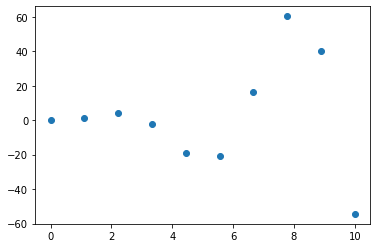

In [8]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

We want to know the values in between.

In [9]:
from scipy.interpolate import interp1d

In [26]:
f = interp1d(x, y, kind='linear')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

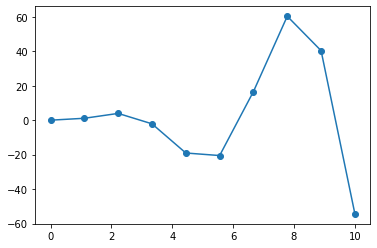

In [27]:
plt.plot(x_dense, y_dense)
plt.scatter(x, y)

In [29]:
f = interp1d(x, y, kind='cubic')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

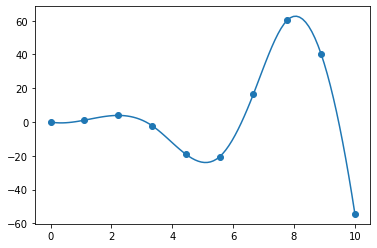

In [30]:
plt.plot(x_dense, y_dense)
plt.scatter(x, y)

# Curve Fitting

Trivial Example

In [31]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2

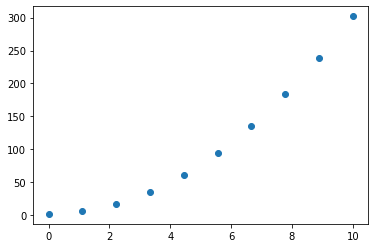

In [32]:
plt.plot(x_data, y_data, 'o')

We want to fit the data to the curve $y = ax^2 + b$. The main goal here is determine the values of $a$ and $b$

In [34]:
from scipy.optimize import curve_fit

In [35]:
def func(x, a, b):
    return a*x**2 + b

In [36]:
popt, pcov = curve_fit(func, x_data, y_data, p0=(1,1))

In [37]:
popt

array([3., 2.])

In [38]:
pcov

array([[ 2.39622727e-33, -8.43117008e-32],
       [-8.43117008e-32,  5.59996251e-30]])

The equation for spring motion is $y(t) = A\cos(\omega t+\phi)$. We want to find the natural frequency of oscillation $\omega$ for the spring.

In [39]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

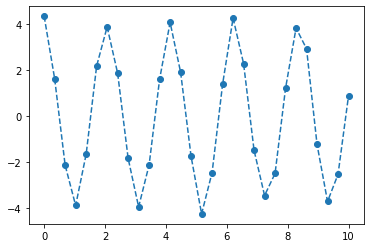

In [40]:
plt.plot(t_data,y_data,'o--')

In [41]:
from scipy.optimize import curve_fit

In [42]:
def func(x, A, w, phi):
    return A*np.cos(w*x+phi)

$\omega = 2 \pi f$, $f=1/T$, and $T \approx 2$ seconds. Thus good initial guess is

* $\omega = 2 \pi (1/2) = \pi$
* $A=4$
* $\phi = 0$

In [43]:
popt, pcov = curve_fit(func, t_data, y_data, p0=(4, np.pi, 0))

In [44]:
popt

array([3.94836219, 2.99899521, 0.1041135 ])

In [45]:
A, w, phi = popt

In [46]:
t = np.linspace(0, 10, 100)
y = func(t, A, w, phi)

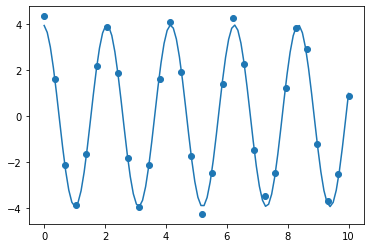

In [47]:
plt.scatter(t_data,y_data)
plt.plot(t,y)

In [49]:
pcov

array([[ 0.61137452, -0.09639206,  0.4650863 ],
       [-0.09639206,  0.4257377 , -2.08785196],
       [ 0.4650863 , -2.08785196, 13.86436063]])

The estimated error on the parameters

In [50]:
np.sqrt(np.diag(pcov))

array([0.78190442, 0.65248578, 3.7234877 ])

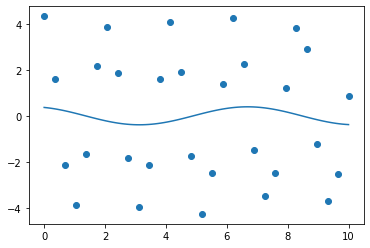

In [48]:
popt, pcov = curve_fit(func, t_data, y_data, p0=(4, 1, 0))
A, w, phi = popt
y = func(t, A, w, phi)
plt.scatter(t_data,y_data)
plt.plot(t,y)